In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('wdbc.data')

In [3]:
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [4]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

In [5]:
#encode qualitative
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y= le.transform(y)

In [6]:
le.transform(['M', 'B'])

array([1, 0])

In [7]:
#split dateset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1239,
                                                    stratify = y)

In [8]:
#make pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pl1 = Pipeline([('scaler', StandardScaler()),
                ('pca', PCA(n_components = 2)),
                ('classifier', LogisticRegression())])

In [9]:
pl1.fit(X_train, y_train)
print('Test accuracy: ', pl1.score(X_test, y_test))

Test accuracy:  0.9210526315789473


# Cross validation

In [10]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 10)

In [11]:
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [12]:
type(skf.split(X_train, y_train))

generator

In [13]:
for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    print(f'Index {i}: train_index: {train_index}, test_index: {test_index}')

Index 0: train_index: [ 36  38  40  43  45  49  50  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 

In [14]:
for i, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train)):
    X_train_cross, X_test_cross = X_train[train_idx], X_train[test_idx]
    y_train_cross, y_test_cross = y_train[train_idx], y_train[test_idx]

    lr = LogisticRegression(C = 100, random_state = 84957)
    lr.fit(X_train_cross, y_train_cross)
    print(f'Fold {i}: {lr.score(X_test_cross, y_test_cross)}')

Fold 0: 0.9130434782608695
Fold 1: 0.9347826086956522


D:\ap\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ap\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ap\Lib\

Fold 2: 0.9565217391304348
Fold 3: 0.9782608695652174
Fold 4: 0.9111111111111111
Fold 5: 0.9111111111111111
Fold 6: 0.9777777777777777
Fold 7: 0.9111111111111111
Fold 8: 0.9333333333333333
Fold 9: 0.9777777777777777


D:\ap\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ap\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ap\Lib\

In [15]:
#less verbose one
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = pl1, 
                         X=X_train,
                         y=y_train,
                         cv = 10,
                         n_jobs = 1)
print(f'CV accuracy scores: {scores}')

CV accuracy scores: [0.93478261 0.95652174 0.97826087 0.97826087 0.93333333 1.
 1.         0.91111111 0.97777778 0.93333333]


In [16]:
print(f'CV accuracy: {np.mean(scores):.2f} +/- {np.std(scores):.2f}')

CV accuracy: 0.96 +/- 0.03


# Learning curve

C:\Users\Admin\AppData\Local\Temp\ipykernel_13184\3730900288.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


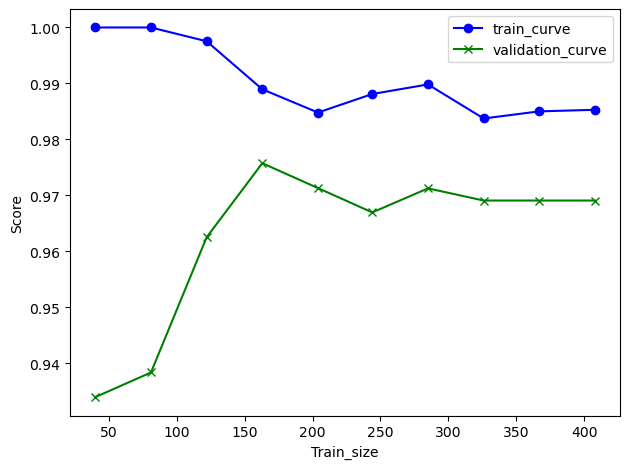

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pl2 = Pipeline([('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])
pl2.set_params(classifier__C = 1.0, classifier__solver = 'liblinear', classifier__penalty = 'l1')
train_sizes, train_scores, validation_scores = learning_curve(estimator = pl2,
                                                              X = X_train,
                                                              y = y_train,
                                                              train_sizes = np.linspace(.1, 1.0, 10),
                                                              cv = 10,
                                                              n_jobs = -1)
fig, ax = plt.subplots()
ax.plot(train_sizes, train_scores.mean(axis = 1), color = 'blue', marker = 'o', label = 'train_curve')
ax.plot(train_sizes, validation_scores.mean(axis = 1), color = 'green', marker = 'x', label = 'validation_curve')
ax.set_xlabel('Train_size')
ax.set_ylabel('Score')
ax.legend()
fig.tight_layout()
fig.show()

In [18]:
from sklearn.model_selection import validation_curve
pl3 = Pipeline([('scaler', StandardScaler()),
                ('clf', LogisticRegression())])
param_range = [.001, .01, .1, 1.0, 10.0, 100.0]
train_scores, validation_scores = validation_curve(estimator = pl3,
                                                   X = X_train,
                                                   y = y_train,
                                                   param_name = "clf__C",
                                                   param_range = param_range,
                                                   cv = 10)

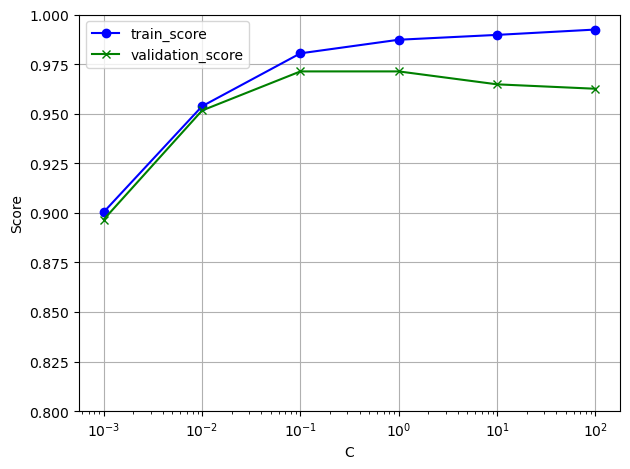

In [19]:
fig, ax = plt.subplots()
ax.plot(param_range, train_scores.mean(axis = 1), color = 'blue', marker = 'o', label = 'train_score')
ax.plot(param_range, validation_scores.mean(axis = 1), color = 'green', marker = 'x', label = 'validation_score')
ax.set_xlabel('C')
ax.set_ylabel('Score')
ax.set_xscale('log')
ax.grid(True)
ax.set_ylim(0.8, 1.0)
ax.legend(loc = 'upper left')
fig.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13184\4007014548.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


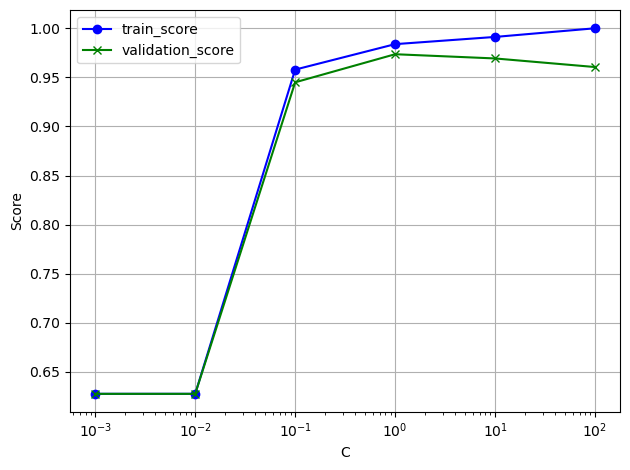

In [20]:
from sklearn.svm import SVC
param_range = [.001, .01, .1, 1.0, 10.0, 100.0]
pipe1 = Pipeline([('scaler', StandardScaler()),
                  ('sv', SVC())])
train_scores, validation_scores = validation_curve(estimator = pipe1,
                                                   X = X_train,
                                                   y = y_train,
                                                   param_name = "sv__C",
                                                   param_range = param_range,
                                                   cv = 10)
fig, ax = plt.subplots()
ax.plot(param_range, train_scores.mean(axis = 1), marker = 'o', color = 'blue', label = 'train_score')
ax.plot(param_range, validation_scores.mean(axis = 1), marker = 'x', color = 'green', label = 'validation_score')
ax.grid(True)
ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('Score')
ax.legend()
fig.tight_layout()
fig.show()
                 

# Fine-tunning

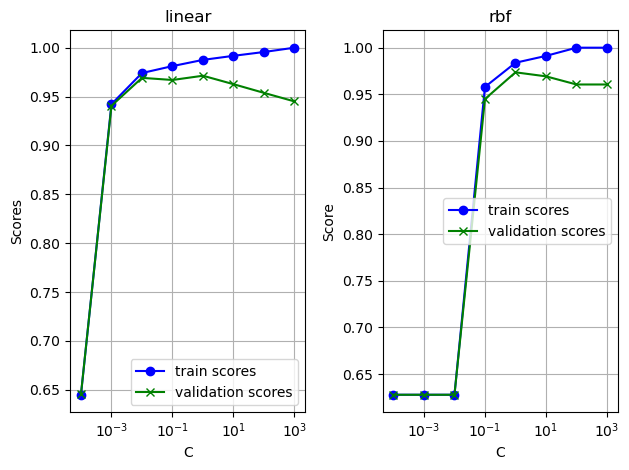

In [21]:
# do fine-tunning manually
from sklearn.model_selection import validation_curve
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
pipe1 = Pipeline([('scaler', StandardScaler()),
              ('svc', SVC())])
pipe1.set_params(svc__kernel = 'linear')
train_scores, validation_scores = validation_curve(estimator = pipe1,
                                                   X = X_train,
                                                   y = y_train,
                                                   param_name = 'svc__C',
                                                   param_range = param_range,
                                                   cv = 10)
fig, axes = plt.subplots(1, 2)
axes[0].plot(param_range, train_scores.mean(axis = 1), marker = 'o', color = 'blue', label = 'train scores')
axes[0].plot(param_range, validation_scores.mean(axis = 1), marker = 'x', color = 'green', label = 'validation scores')
axes[0].set_xscale('log')
axes[0].set_xlabel('C')
axes[0].set_ylabel('Scores')
axes[0].set_title('linear')
axes[0].legend()
axes[0].grid(True)
pipe1.set_params(svc__kernel = 'rbf')
train_scores, validation_scores = validation_curve(estimator = pipe1,
                                                   X = X_train,
                                                   y = y_train,
                                                   param_name = 'svc__C',
                                                   param_range = param_range,
                                                   cv = 10)
axes[1].plot(param_range, train_scores.mean(axis = 1), marker = 'o', color = 'blue', label = 'train scores')
axes[1].plot(param_range, validation_scores.mean(axis = 1), marker = 'x', color = 'green', label = 'validation scores')
axes[1].set_xscale('log')
axes[1].set_xlabel('C')
axes[1].set_ylabel('Score')
axes[1].set_title('rbf')
axes[1].legend()
axes[1].grid(True)
fig.tight_layout()
plt.show()



In [22]:
#tuning-hyperparameter using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = Pipeline([('scaler', StandardScaler()),
                     ('svc', SVC(random_state = 1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__kernel': ['rbf'],
               'svc__gamma': param_range}]
gs = GridSearchCV(estimator = pipe_svc,
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  cv = 10,
                  refit = True, 
                  n_jobs = -1)
gs.fit(X_train, y_train)
print(gs.best_score_)

0.9779710144927536


In [23]:
print(gs.best_params_)

{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [24]:
clf = gs.best_estimator_

In [25]:
clf.score(X_test, y_test)

0.9912280701754386

In [28]:
#using randomized grid search
import scipy
param_range = scipy.stats.loguniform(0.0001, 1000.0)
from sklearn.model_selection import RandomizedSearchCV
pipe_svc = Pipeline((['scaler', StandardScaler()],
                     ['clf', SVC()]))
param_grid = [{'clf__kernel': ['linear'],
              'clf__C': param_range},
             {'clf__kernel': ['rbf'],
              'clf__C': param_range,
              'clf__gamma': param_range}]
rs = RandomizedSearchCV(estimator = pipe_svc,
                        param_distributions = param_grid,
                        scoring = 'accuracy',
                        n_iter = 20,
                        cv = 10,
                        random_state = 1,
                        n_jobs = -1)
rs.fit(X_train, y_train)
print(rs.best_score_)

0.9691787439613527


In [29]:
rs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ['clf',
                 SVC(C=np.float64(6.259454728975174),
                     gamma=np.float64(0.002698769218906984))]])

In [33]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
hs = HalvingRandomSearchCV(estimator = pipe_svc,
                     param_distributions = param_grid,
                     scoring = 'accuracy',
                     cv = 10,
                     factor = 2,
                     random_state = 1,
                     n_jobs = -1)

In [40]:
hs.fit(X_train, y_train)

HalvingRandomSearchCV(cv=10,
                      estimator=Pipeline(steps=(['scaler', StandardScaler()],
                                                ['clf', SVC()])),
                      factor=2, n_jobs=-1,
                      param_distributions=[{'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000190E50E2490>,
                                            'clf__kernel': ['linear']},
                                           {'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000190E50E2490>,
                                            'clf__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000190E50E2490>,
                                            'clf__kernel': ['rbf']}],
                      random_state=1, scoring='accuracy')

In [41]:
hs.best_score_

np.float64(0.9744959677419356)

In [42]:
hs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ['clf',
                 SVC(C=np.float64(0.05971247755848463), kernel='linear')]])